In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('stocks.csv')[['ticker','date','ret']]

In [3]:
df.date = df.date//100

In [4]:
df = df[df.date>201000]

In [5]:
df['ret'] = df['ret']*100

In [6]:
n = 28

In [7]:
sample = []
for stock in set(df.ticker):
        x = df[df.ticker==stock].set_index('date').dropna()
        if len(x)>120:
            sample.append(x[['ret']].rename({'ret':stock},axis=1))

In [8]:
df = pd.concat(sample,axis=1)

In [9]:
w = [1/n]*n

$ w^t \times V \times w \$

In [10]:
# portfolio variance
std = np.sqrt(df.cov().mul(w,axis=0).mul(w,axis=1).sum().sum())

eret = df.mul(w,axis=1).sum(axis=1).mean()*12

In [11]:
np.random.normal(20)

18.919869028908455

In [12]:
w = np.random.rand(n)

w = w / w.sum()

In [13]:
def ret_var(w):
    std = np.sqrt(df.cov().mul(w,axis=0).mul(w,axis=1).sum().sum())
    eret = df.mul(w,axis=1).sum(axis=1).mean()*12
    return eret,std,w

In [14]:
list_of_retvar = []
for _ in range(5000):
    w = np.random.rand(n) - np.random.rand(n)
    w = w / w.sum()
    if w.max()<3 and w.min()>=-1:
        list_of_retvar.append(ret_var(w))    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='std', ylabel='ret'>

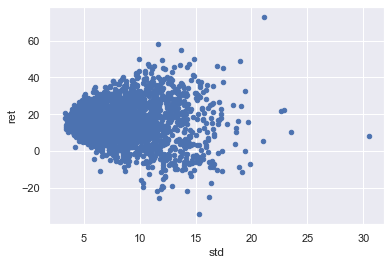

In [15]:
ports = pd.DataFrame(list_of_retvar,columns=['ret','std','w'])
ports.plot(x='std',y='ret',kind='scatter')#.plot(x='std',y='ret',kind='scatter',xticks=range(10),yticks=range(25))

In [16]:
ports['sharpe'] = (ports['ret'] - 1.6)/ports['std']

ports.sort_values('sharpe')

,ret,std,w,sharpe
2566,-34.44,15.27,"[0.011247971670772952, -0.6073759628618244, -0.5551665301517641, 0.7698260381144002, -0.63296721...",-2.36
1595,-25.39,11.72,"[0.2071295660211672, 0.1632420081509025, -0.3344940668342533, -0.2385095883586903, -0.0554661804...",-2.30
2617,-19.32,10.29,"[0.6923398740261425, 0.034948011919841857, -0.2757081427548968, 0.5517685220882893, -0.680924048...",-2.03
315,-21.69,11.57,"[0.5691561784556542, -0.3901027428881766, 0.16517268959447184, 0.009185232852365496, -0.11798507...",-2.01
3500,-10.83,6.47,"[0.3304479791512782, -0.0262999160309901, -0.4448275782624442, 0.6234421486396711, -0.0115705984...",-1.92
...,...,...,...,...
673,35.00,6.00,"[0.13101183635015878, -0.002828418166692476, -0.17325323381071, 0.08033075089241117, -0.10558191...",5.56
1377,29.79,5.06,"[-0.15139645844792904, 0.1989256160198248, 0.06890627237276647, 0.16477931331329415, -0.01807649...",5.57
1704,25.18,4.09,"[0.002993389247633742, -0.06808180794329731, 0.09294312052842206, -0.16300790639896473, 0.133622...",5.76
1650,20.64,3.28,"[-0.012547735149596378, 0.1536795934137825, 0.1518196104122205, -0.026384145748230288, 0.0046408...",5.81


In [17]:
from concurrent.futures import ProcessPoolExecutor

In [20]:
def compute(_):
    r = np.random.RandomState()
    w = r.rand(n) - r.rand(n)
    w = w / w.sum()
    if w.max()<3 and w.min()>=-1:
        return ret_var(w)

In [23]:
with ProcessPoolExecutor() as p:
    ports = pd.DataFrame(p.map(compute,range(1000000)),columns=['ret','std','w'])

In [24]:
ports['sharpe'] = (ports['ret'] - 1.6)/ports['std']
ports.dropna().sort_values('sharpe')

,ret,std,w,sharpe
26191,-65.20,19.85,"[1.1288138797292384, -0.6301603622115587, 0.7981496402956644, 0.6153772140446336, 0.435106222427...",-3.36
609011,-49.75,15.41,"[0.6488755948928755, 0.10141787558182772, -0.48517570672124744, -0.17246078361397904, -0.7913718...",-3.33
199380,-56.85,18.87,"[-0.7833988824722561, -0.9807080418359103, -0.9189181125579021, 0.3981561068759129, -0.273240876...",-3.10
930696,-52.01,17.35,"[-0.10913491765241372, -0.89574601272051, -0.17112280532133792, 1.3905825022613647, -0.494675348...",-3.09
965913,-46.47,15.56,"[0.7299189243251537, -0.032002332828651094, 0.010726374582364192, 0.4406171330742931, 0.29516029...",-3.09
...,...,...,...,...
491335,30.68,4.55,"[-0.2102518461151357, 0.04311025755114437, -0.09179895818985549, -0.22020809319020307, 0.0969500...",6.39
184804,35.28,5.27,"[-0.28329988524509236, 0.21388534776563886, 0.25196453250520057, -0.33175797424532744, 0.2638625...",6.40
477599,34.91,5.21,"[-0.3006946636820731, 0.026203042119398123, 0.0733337964412519, 0.05172940714995064, -0.09837517...",6.40
452448,28.08,4.09,"[-0.10201619494208723, 0.09423837987685829, -0.11231319730338318, -0.1463157155472711, 0.1791468...",6.47
